# Prediction of term deposit subscription

## 1. Business Problem Understanding

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## 2. Data Understanding

**[FILE USED]**
<BR>
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
<br>
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

**[VARIABLE DESCRIPTION]**
<br>
1 - age : client's age(numeric)
<br>
2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
<br>
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
<br>
4 - education : (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
<br>
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
<br>
**[TARGET DESCRIPTION]**
<br>
1 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**[FEATURE]**
<br>
Categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
<br>
Numeric: age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed (duration excluded due to its highly affect to target)

**[TARGET]**
<br>
y (0 or 1)

## 3. Data Preparation

### 3.1 Import the libraries and read the data needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Read the all the files needed and assign them into variables. We use bank-additional-full and bank-additional because variable in bank-full and bank didn't explained 

In [2]:
baf = pd.read_csv('bank-additional-full.csv')
ba = pd.read_csv('bank-additional.csv')

We need to change the target to 0 or 1 so the algorithm can understand the data

In [3]:
baf['y'] = baf['y'].apply(lambda x: 1 if x == 'yes' else 0)
ba['y'] = ba['y'].apply(lambda x: 1 if x == 'yes' else 0)

### 3.2 Explore the basic statistics of the data

In [4]:
baf.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Find out about the data type

In [5]:
baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
baf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From the basic statiscs and information about the dataset, there are 2 types of feature: numeric and categorical.

### 3.3 Exploratory Data Analysis

What I want to see first is if the group of term-subscriber and not subscriber is balance or not

Text(0.5, 1.0, 'Distribution of y')

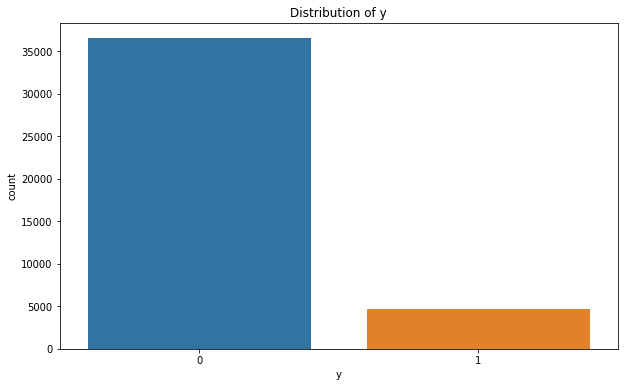

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='y',data = baf)
sns.countplot(x='y',data = ba)
plt.xlabel('y')
plt.title('Distribution of y')

It seems the distribution heavily concentrated on not subscriber

#### 3.3.1 Numerical Feature

**[Pdays]**
<br>
In statistics basic info, there is something strange with the **'pdays'** feature. The 25%, 50%,  75% quartile shows exact same value 999 (could be seen in distribution above) which means almost all proportion is 999. It seems **whether a customer subscribe a term-deposit or not is less likely affected by the days passed by after the client was last contacted from a previous campaign**

In [8]:
baf['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

**[Age]**
<br>
The average customer's age is around 35-40 and it make sense because bank will more likely contact people who mature enough to think about future investment, plus it is a low-risk investment and mature people more prefer this kind of investment rather than young people. I will use this as a predictor.

Text(0, 0.5, 'Frequency')

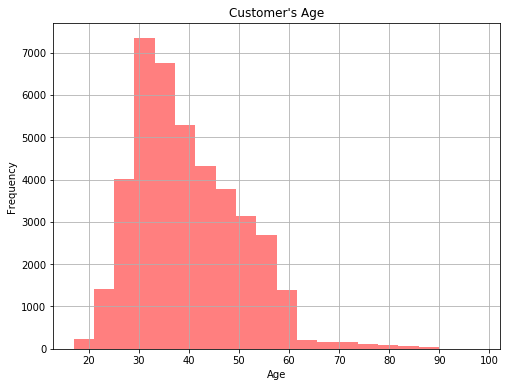

In [9]:
plt.figure(figsize=(8,6))
baf['age'].hist(alpha=0.5,color='red',bins=20,label='y')
plt.title("Customer's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

**[Campaign]**
<br>
Number of contacts performed during this campaign and for this client mostly less than 5 and it makes sense because we shouldn't contact same people for campaigning our progroam for many times. The outliers shows it even reaches 50

Text(0, 0.5, 'Frequency')

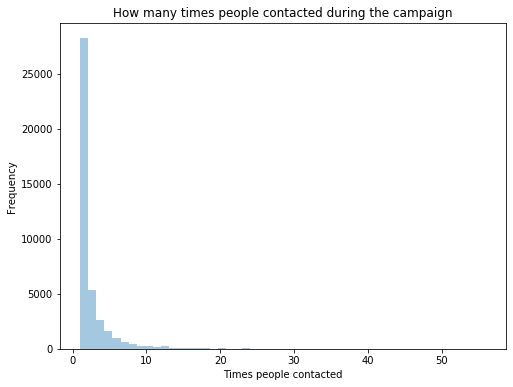

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(baf['campaign'],kde=False)
plt.title('How many times people contacted during the campaign')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

**[Previous]**
<br>
Most of the client didn't contacted before this campaign, so I will look whether number of contact performed in previous campaign affect the customer to subsribe the term-deposit or not by seeing distribution of people who subscribed and have contacted before

Text(0, 0.5, 'Frequency')

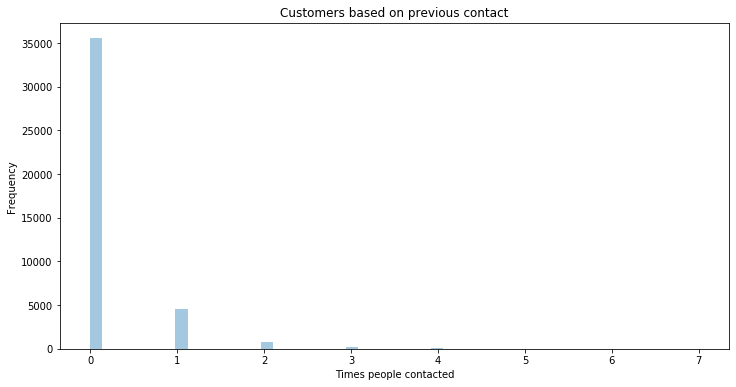

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(baf['previous'],kde=False)
plt.title('Customers based on previous contact')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

The graph shows that if you contacted many times (in this case 6) in previous campaign, you will less likely to subscribe term-deposit and I think it makes sense since bank could seems annoying if keep contact the same person. I think this will be good relation with possibility customer to subscribe term-deposit

Text(0, 0.5, 'Frequency')

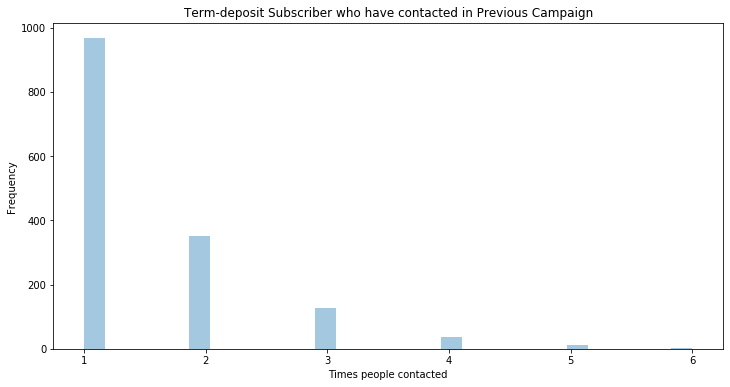

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(baf[(baf['previous'] != 0) & (baf['y'] == 1)]['previous'],kde=False)
plt.title('Term-deposit Subscriber who have contacted in Previous Campaign')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

**[Consumer Confidence Index]**
<br>
Because it is a monthly indicator, the graph shows when is the people tend to subsribe term-deposit. Looks like no significant trend there

Text(0, 0.5, 'Frequency')

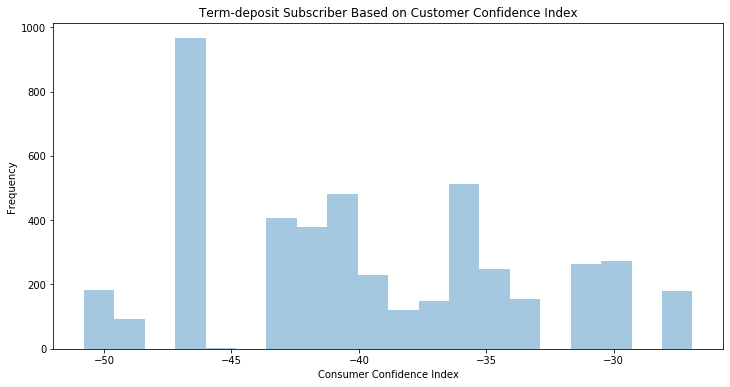

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(baf[baf['y']==1]['cons.conf.idx'],kde=False)
plt.title('Term-deposit Subscriber Based on Customer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')

Logistic regression required features that are independent to each other, which means not highly correlated. From the heatmap, using |x|<0.6 where x = the correlation as cut-off , there are highly correlated features: **emp.var.rate**, **euribor3m**, **nr.employed**, **cons.price.idx**. 
<br>
<br>
For the logistic regression method, it is not a good condition to have some highly correlated features because it will cause **Multicollinear Effect** and could make the model wrongly interpreted. So I am going to eliminate 3 of them based on the feature capability to separate which costumers subscribe term deposit and which are not.

Text(0.5, 1, 'Correlation between numeric variable')

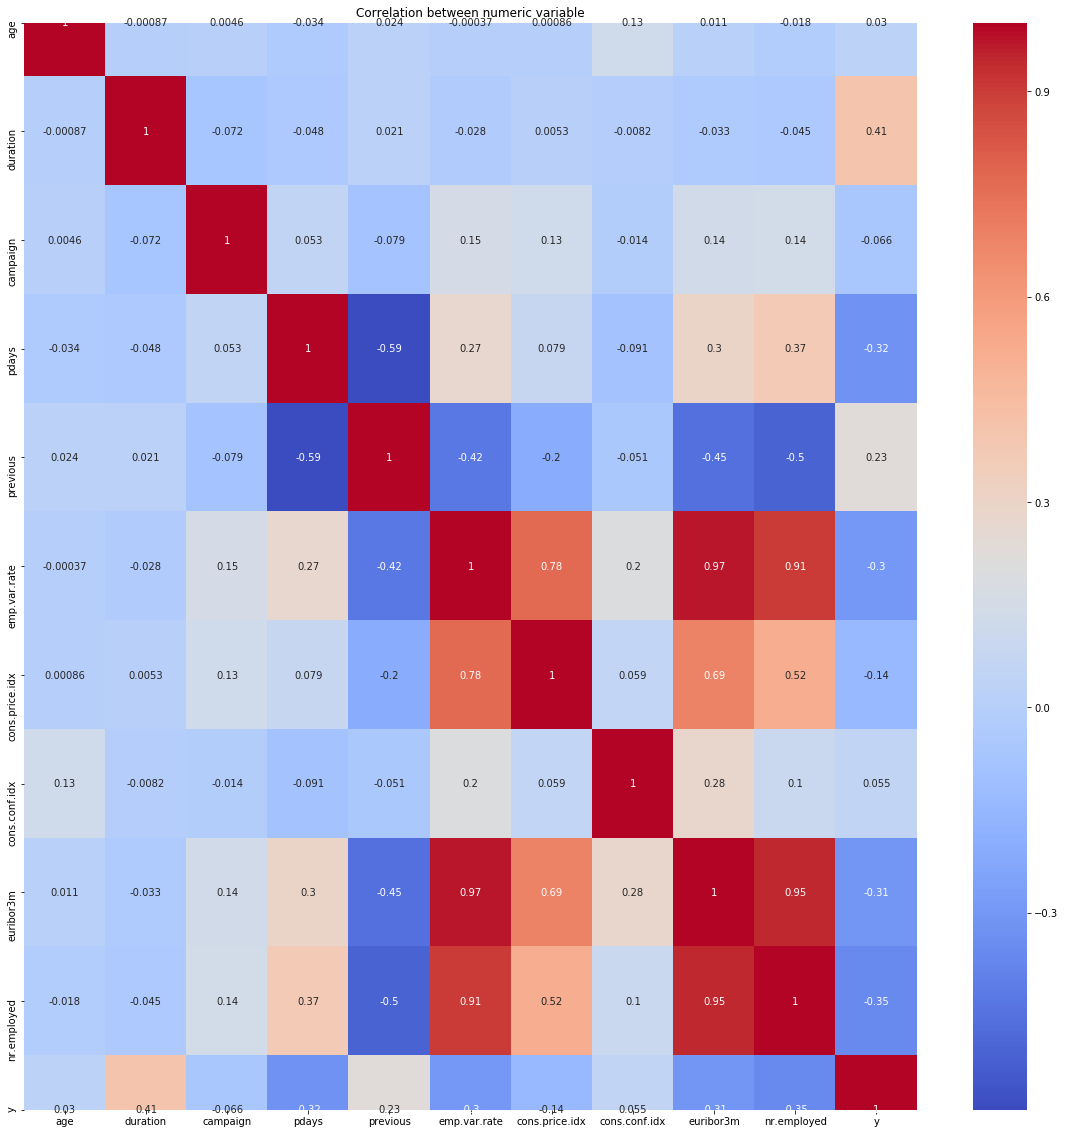

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(baf.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation between numeric variable')

Even they are numeric feature, they are more likely a categorical feature with number as value because they are daily/monthly/quarterly indicator. So I am choosing box and whisker plot to see the separation of y based on each feature

Text(0, 0.5, 'euribor3m')

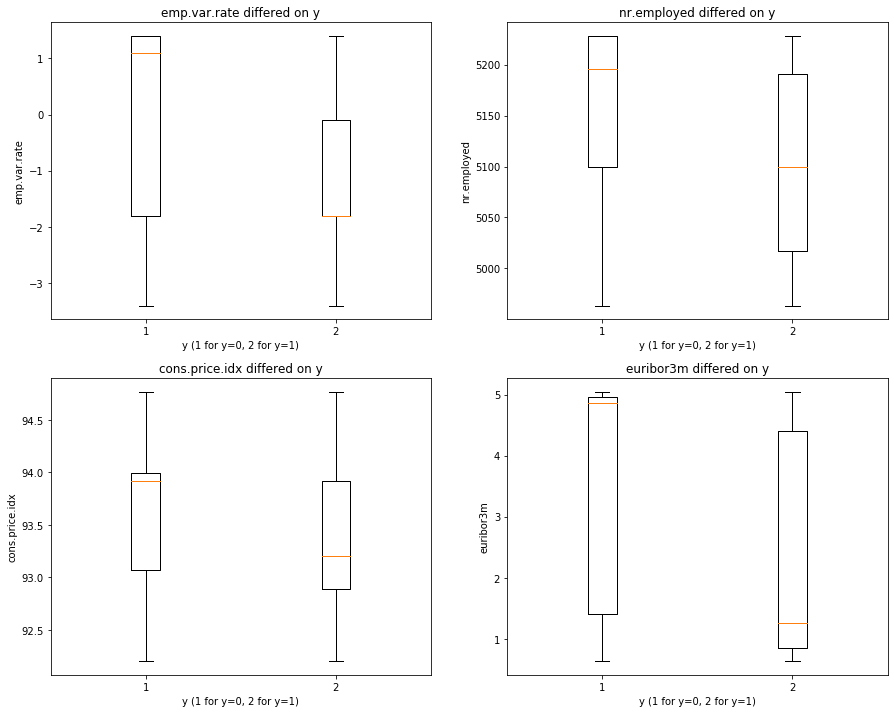

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,12))

df1 = [baf[baf['y'] == 0]['emp.var.rate'],baf[baf['y'] == 1]['emp.var.rate']]
df2 = [baf[baf['y'] == 0]['nr.employed'],baf[baf['y'] == 1]['nr.employed']]
df3 = [baf[baf['y'] == 0]['cons.price.idx'],baf[baf['y'] == 1]['cons.price.idx']]
df4 = [baf[baf['y'] == 0]['euribor3m'],baf[baf['y'] == 1]['euribor3m']]

axes[0,0].boxplot(df1)
axes[0,0].set_title('emp.var.rate differed on y')
axes[0,0].set_xlabel('y (1 for y=0, 2 for y=1)')
axes[0,0].set_ylabel('emp.var.rate')

axes[0,1].boxplot(df2)
axes[0,1].set_title('nr.employed differed on y')
axes[0,1].set_xlabel('y (1 for y=0, 2 for y=1)')
axes[0,1].set_ylabel('nr.employed')

axes[1,0].boxplot(df3)
axes[1,0].set_title('cons.price.idx differed on y')
axes[1,0].set_xlabel('y (1 for y=0, 2 for y=1)')
axes[1,0].set_ylabel('cons.price.idx')

axes[1,1].boxplot(df4)
axes[1,1].set_title('euribor3m differed on y')
axes[1,1].set_xlabel('y (1 for y=0, 2 for y=1)')
axes[1,1].set_ylabel('euribor3m')

From the box and whisker plot, it could be seen that from these feature **nr.employed** are the one with most separated distribution, which means it has the best capability to differed based on y. So for the Logistic Regression Model I choose to continue with nr.employed and eliminated the other features.

#### 3.3.2 Categorical Feature

For categorical features, I,m using barplot to see if any predictor could differ the term-deposit subscriber or not using barplot. Because I already transform the target from 'yes' or 'no' to 1 or 0, I could measure how many term-deposit using **estimator: sum**. Because the machine learning algorithm only understand number as data input, I have to transform the categorial feature with string type to number type

**[Job]**
<br>
The distribution of term deposit subscriber based customer's job type is well-distributed, not concentrated on one particular job. Make sense because **the bank couldn't choose the customer based on their job**. 

Text(0.5, 0, 'Job')

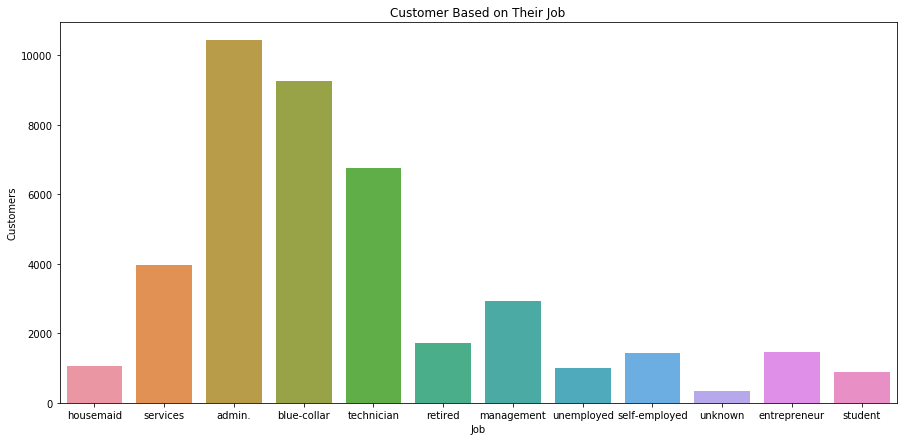

In [16]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'job',data = baf)
plt.title("Customer Based on Their Job")
plt.ylabel('Customers')
plt.xlabel('Job')

**[Marital]**
<br>
The graph shows distribution of term-deposit subscriber based on their marital status. It seems concentrated to whom are already married. **Eventually, people will be married after they have healthy financial security, so are people who invest in term-deposit**.

Text(0.5, 0, 'Marital')

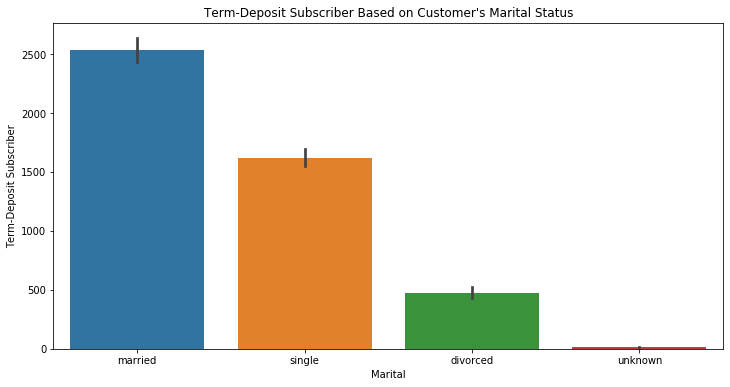

In [17]:
plt.figure(figsize = (12,6))
sns.barplot(x ='marital',y='y',data=baf,estimator=sum)
plt.title("Term-Deposit Subscriber Based on Customer's Marital Status")
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Marital')

**[Education]**
<br>
The distribution of term deposit subscriber based customer's education type is concentrated for the customer with higher education degree. Well, it supposed to be like that because **the higher academic degree you achieved, more possible you will have good financial literacy and invest some of your money in term-deposit**. 

Text(0.5, 0, 'Education')

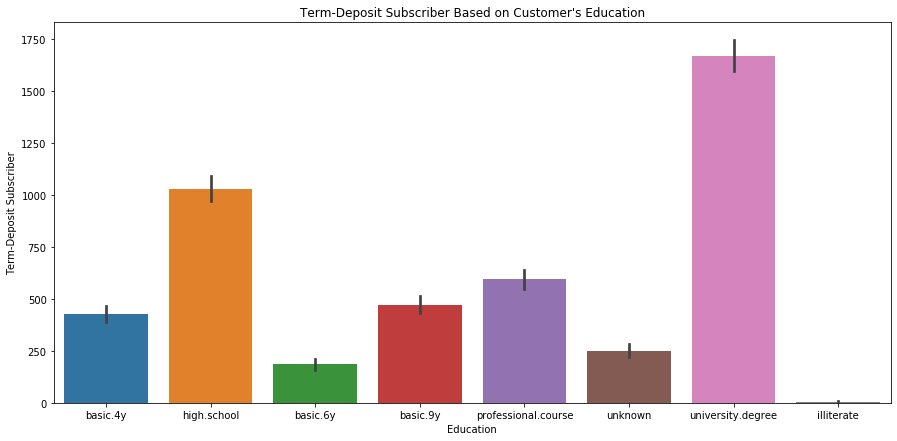

In [18]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'education',y = 'y',data = baf,estimator = sum)
plt.title("Term-Deposit Subscriber Based on Customer's Education")
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Education')

**[Default]**
<br>
The distribution of term deposit subscriber based customer's default status is seems good to diverge term-deposit subscription status. **People should be subscribed term-deposit after they pay off all their credit**

Text(0.5, 0, 'Default')

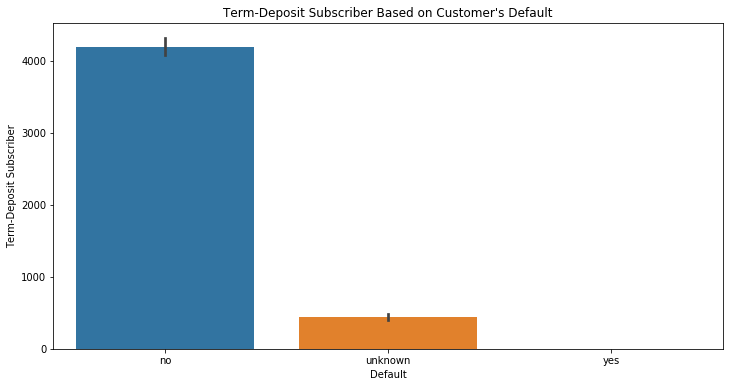

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x='default',y='y',data=baf,estimator=sum)
plt.title("Term-Deposit Subscriber Based on Customer's Default")
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Default')

**[Housing]**
<br>
The distribution of term deposit subscriber based customer's housing status is seems good only if it divided based on known or unknown but it leaves high ambiguity between 'yes' or 'no'. Even this is a loan ,it is not exactly like a personal loan or credit default. **There are people has housing loan for buying their home, there are who want to invest buy buying home which means they have good financial security so they can invest their money in term-deposit**.

Text(0.5, 0, 'Housing')

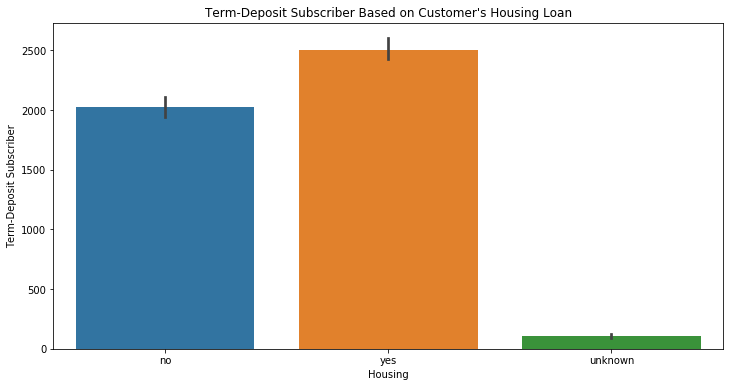

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='housing',y='y',data=baf,estimator=sum)
plt.title("Term-Deposit Subscriber Based on Customer's Housing Loan")
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Housing')

**[Loan]**
<br>
Term-deposit subscriber concentrated on people who don't have personal loan. **Same as credit which the people who are going to invest should pay off their loan first**.

Text(0.5, 0, 'Loan')

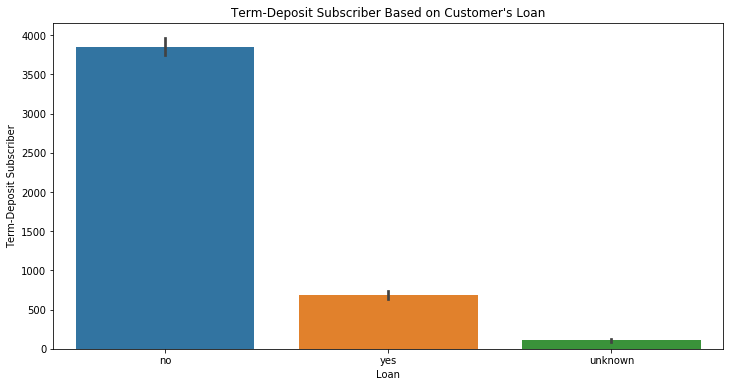

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='loan',y='y',data=baf,estimator=sum)
plt.title("Term-Deposit Subscriber Based on Customer's Loan")
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Loan')

**[Contact]**
<br>
Term-deposit subscriber concentrated on people who contacted by cell-phone

Text(0.5, 0, 'Contact')

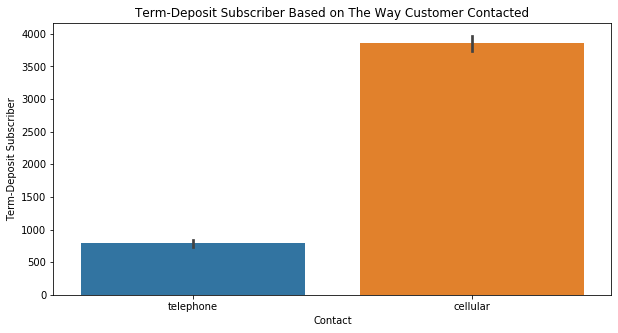

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='contact',y='y',data=baf,estimator=sum)
plt.title('Term-Deposit Subscriber Based on The Way Customer Contacted')
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Contact')

**[Month]**
<br>
The distribution of term deposit subscriber based customer's month when contacted  is well-distributed and not concentrated on a particular month

Text(0.5, 0, 'Month')

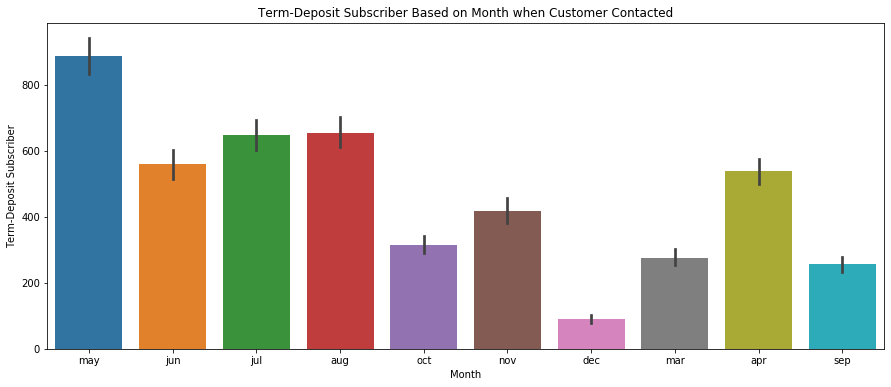

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x='month',y='y',data=baf,estimator=sum)
plt.title('Term-Deposit Subscriber Based on Month when Customer Contacted')
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Month')

**[Day of Week]**
<br>
The distribution of term deposit subscriber based customer's day of week contacted is well-distributed. It won't be a good feature.

Text(0.5, 0, 'Day of Week')

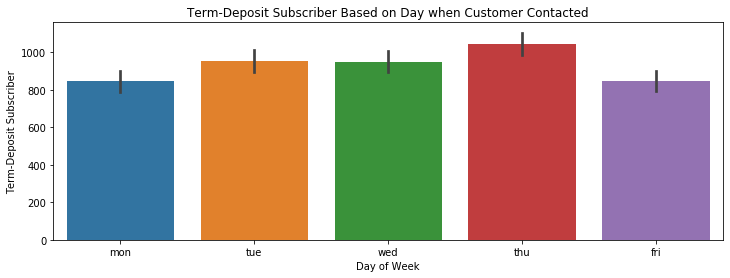

In [24]:
plt.figure(figsize=(12,4))
sns.barplot(x='day_of_week',y='y',data=baf,estimator=sum)
plt.title('Term-Deposit Subscriber Based on Day when Customer Contacted')
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Day of Week')

**[Poutcome]**
<br>
Outcome of the previous marketing campaign related well enough with subscriber term-deposit

Text(0.5, 0, 'Poutcome')

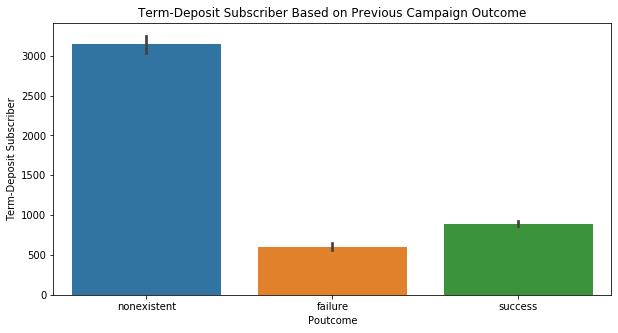

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='poutcome',y='y',data=baf,estimator=sum)
plt.title('Term-Deposit Subscriber Based on Previous Campaign Outcome')
plt.ylabel('Term-Deposit Subscriber')
plt.xlabel('Poutcome')

### 3.4 Final Data for Model

For the sklearn could understand the data, I should change the categorial data into dummy variables.  Assuming ba as sample from baf (since ba is 10% random data from baf) I will treat ba as I treated baf without further exploratory analysis. What I will do is **changing every categorical feature unique values into new columns and make it binary (0 or 1).**

In [26]:
dummies = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
baf = pd.get_dummies(baf,columns=dummies,drop_first=True)
ba = pd.get_dummies(ba,columns=dummies,drop_first = True)

Now I am going to check if there new predictors which are highly correlated (either positive or negative) 

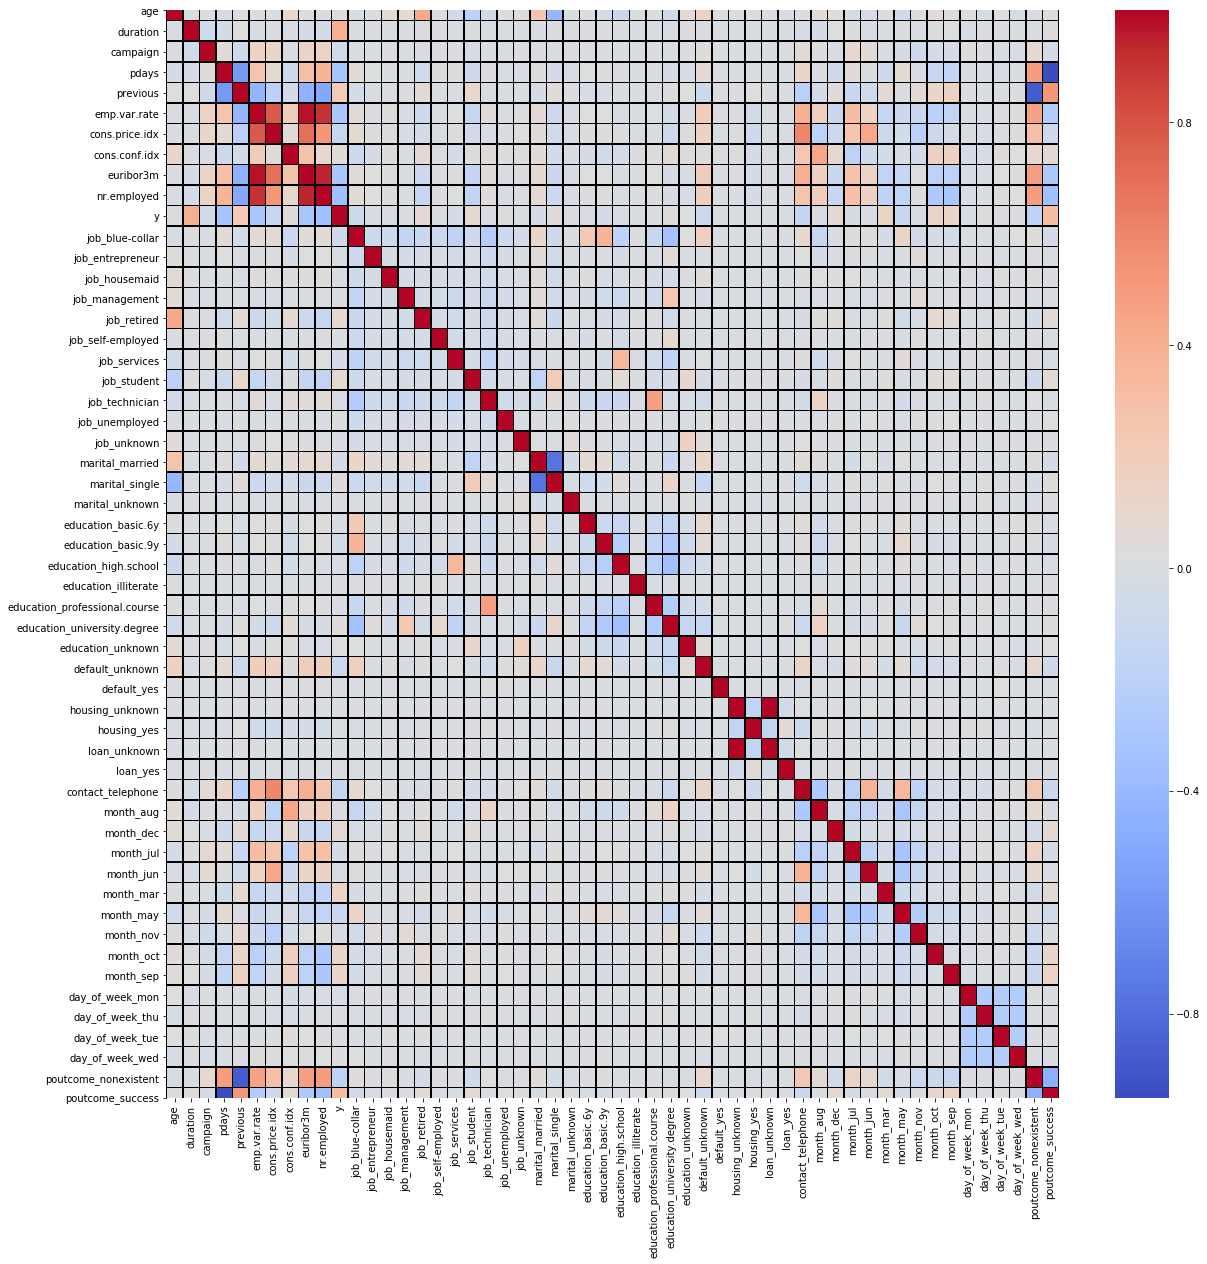

In [27]:
plt.figure(figsize = (20,20))
sns.heatmap(baf.corr(),cmap='coolwarm',linewidths=0.5,linecolor='black')

Yes! There are some pairs of predictors like marital_married with marital_single and poutcome_success with pdays. Since it is categorical change to feature it is make sense. So I will also exclude them

## 4. Modelling

I will try several modelling method for finding the best model to predict term-deposit subscriber. I will try Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Neural Network

### 4.1 Logistic Regression Model

As mentioned before, for logistic regression I will also exclude **emp.var.rate, cons.price.idx,euribor3m**. From the correlation heatmap, some dummy variables who is the reciprocal of the other are highly correlated in negative way (**marital_married** with **marital_single** and **poutcome_success** with **pdays**), and some who is closely related (**housing_unknown** and **loan_unknown**). So I will exclude each one of their pair too

In [28]:
X = baf.drop(['y','duration','emp.var.rate','cons.price.idx','euribor3m','loan_unknown','marital_single','pdays'],axis=1)
y = baf['y']

In [29]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.3,random_state=101)

Importing LogisticRegression, fit it to the train data, and predict for the test data. Prediction will be compared to the y_test to get classification matrix

In [30]:
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(X_train_log,y_train_log)
log_prediction = LogModel.predict(X_test_log)

C:\Users\GL552VW\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.2 Decision Tree Model

Splitting the data to train and test data set

In [31]:
X = baf.drop(['y','duration'],axis=1)
y = baf['y']

In [32]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3,random_state=101)

Importing DecisionTreeClassifier() to develop model based on decision tree algorithm and use it to predict the test data set

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_dt,y_train_dt)
dt_prediction = dt_model.predict(X_test_dt)

### 4.3 Random Forest Model

Splitting the data to train and test data set

In [34]:
X = baf.drop(['y','duration'],axis=1)
y = baf['y']

In [35]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3,random_state=101)

Compiling model using Random Forest Algorithm and use it to predict the dataset

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=600)
rf_model.fit(X_train_rf,y_train_rf)
rf_prediction = rf_model.predict(X_test_rf)

### 4.4 Support Vector Machine Model

For Support Vector Machine model, I will use bank-additional (ba) instead of bank-additional-full (baf) because of the algorithm dependence on computer's performance

In [37]:
X = ba.drop(['y','duration'],axis=1).values
y = ba['y'].values

Splitting the data to train data and test data

In [38]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.3, random_state=101)

The data should be scaled first

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_svc)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
X_train_svc = scaler.transform(X_train_svc)
X_test_svc = scaler.transform(X_test_svc)

Then model compiled with best C and gamma that I find using grid search. After compiled, the model used to predict the test data set  

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_svc,y_train_svc)
svc_prediction = grid.predict(X_test_svc)

C:\Users\GL552VW\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   17.5s finished


### 4.5 TensorFlow Keras Neural Network Model

Keras model only receive data in numpy array format. So for this model I will declare X and y by the values

In [42]:
X = ba.drop(['y','duration'],axis=1).values
y = ba['y'].values

Splitting the data to train data and test data

In [43]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.3, random_state=101)

Before using the data, data must be scaled first

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train_tf)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
X_train_tf = scaler.transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

Importing tensorflow, sequential, dense, and dropout

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Now I'm going to build the model. Because it is binary classification, the last layer should be 1 node only and the last activation function should be sigmoid so the output will be between 0 and 1.

In [47]:
model_tf = Sequential()

model_tf.add(Dense(units = 62,activation='relu'))
model_tf.add(Dense(units = 43,activation='sigmoid'))
model_tf.add(Dense(units = 16,activation='sigmoid'))
model_tf.add(Dense(units = 8,activation='sigmoid'))
model_tf.add(Dense(units = 4,activation='sigmoid'))
model_tf.add(Dense(units = 2,activation='sigmoid'))
model_tf.add(Dense(units = 1,activation = 'sigmoid'))

model_tf.compile(loss='binary_crossentropy',optimizer='adam')

After compiling model, I'm going to use callbacks for early stopping before the model get overfitting

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Model has been compiled and ready to trained.

In [50]:
model_tf.fit(x=X_train_tf, 
             y=y_train_tf, 
             epochs=1000,
             validation_data=(X_test_tf, y_test_tf),verbose=1,
             callbacks=[early_stop])

Train on 2883 samples, validate on 1236 samples
Epoch 1/1000
2883/2883 [==============================] - 2s 661us/sample - loss: 0.8089 - val_loss: 0.7558
Epoch 2/1000
2883/2883 [==============================] - 0s 134us/sample - loss: 0.7183 - val_loss: 0.6851
Epoch 3/1000
2883/2883 [==============================] - 0s 134us/sample - loss: 0.6599 - val_loss: 0.6363
Epoch 4/1000
2883/2883 [==============================] - 0s 139us/sample - loss: 0.6181 - val_loss: 0.5998
Epoch 5/1000
2883/2883 [==============================] - 0s 140us/sample - loss: 0.5853 - val_loss: 0.5701
Epoch 6/1000
2883/2883 [==============================] - 0s 139us/sample - loss: 0.5580 - val_loss: 0.5447
Epoch 7/1000
2883/2883 [==============================] - 0s 138us/sample - loss: 0.5346 - val_loss: 0.5231
Epoch 8/1000
2883/2883 [==============================] - 0s 136us/sample - loss: 0.5143 - val_loss: 0.5039
Epoch 9/1000
2883/2883 [==============================] - 0s 142us/sample - loss: 0.4962

To cross-check either the model overfitting or not, I plot loss on the training data and test data

Text(0.5, 1.0, 'Loss,Val_loss vs Epoch')

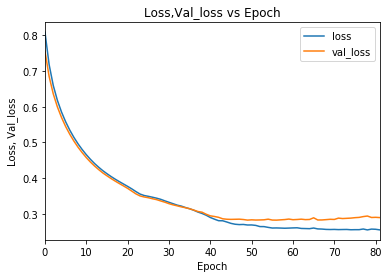

In [51]:
model_loss = pd.DataFrame(model_tf.history.history)
model_loss.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss, Val_loss')
plt.title('Loss,Val_loss vs Epoch')

Because the model seems work well enough where the val_loss flatten and it means it does not overfit the training data, we could use it to predict the test data set

In [52]:
tf_prediction = model_tf.predict_classes(X_test_tf)

## 5. Evaluating Model

After predict X_test using several algorithm, I will check model's performance using **classification report** and **confusion matrix**

### 5.1 Logistic Regression Model

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_log,log_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10978
           1       0.71      0.14      0.24      1379

    accuracy                           0.90     12357
   macro avg       0.81      0.57      0.59     12357
weighted avg       0.88      0.90      0.87     12357



In [54]:
print(confusion_matrix(y_test_log,log_prediction))

[[10896    82]
 [ 1180   199]]


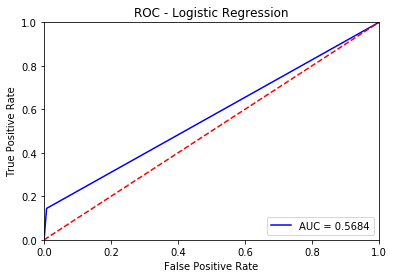

Gini = 0.1368


In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test_log,log_prediction)

fpr, tpr, thresholds = roc_curve(y_test_log,log_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*(logit_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of logistic regression model is around 90% with AUC around 0.57

### 5.2 Decision Tree Model

In [56]:
print(classification_report(y_test_dt,dt_prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10978
           1       0.30      0.33      0.31      1379

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357



In [57]:
print(confusion_matrix(y_test_dt,dt_prediction))

[[9943 1035]
 [ 929  450]]


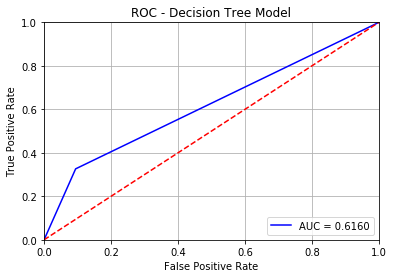

Gini = 0.2320


In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc = roc_auc_score(y_test_dt,dt_prediction)

fpr, tpr, thresholds = roc_curve(y_test_dt,dt_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree Model')
plt.legend(loc="lower right")
plt.grid()
plt.show() 


gini = 2*(dt_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Decision Tree Model is around 84 and AUC = 0.61

### 5.3 Random Forest Model

In [59]:
print(classification_report(y_test_rf,rf_prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10978
           1       0.55      0.29      0.38      1379

    accuracy                           0.89     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.89      0.88     12357



In [60]:
print(confusion_matrix(y_test_rf,rf_prediction))

[[10655   323]
 [  977   402]]


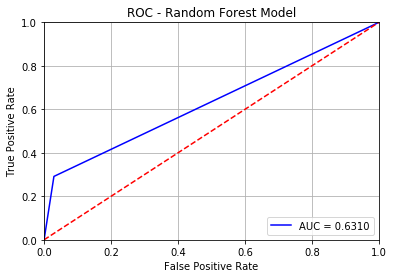

Gini = 0.2621


In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_true=y_test_rf,y_score=rf_prediction)

fpr, tpr, thresholds = roc_curve(y_test_rf,rf_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest Model')
plt.legend(loc="lower right")
plt.grid()
plt.show() 


gini = 2*(rf_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Random Forest Model is around 89% and AUC = 0.63

### 5.4 Support Vector Machine Model

In [62]:
print(classification_report(y_test_svc,svc_prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1102
           1       0.50      0.19      0.27       134

    accuracy                           0.89      1236
   macro avg       0.70      0.58      0.61      1236
weighted avg       0.86      0.89      0.87      1236



In [63]:
print(confusion_matrix(y_test_svc,svc_prediction))

[[1077   25]
 [ 109   25]]


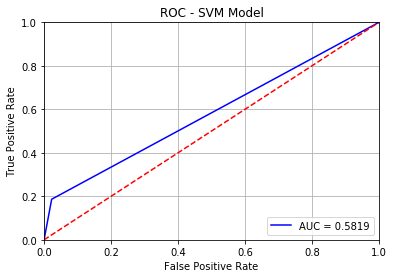

Gini = 0.1639


In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc = roc_auc_score(y_test_svc,svc_prediction,max_fpr=1)

fpr, tpr, thresholds = roc_curve(y_test_svc,svc_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM Model')
plt.legend(loc="lower right")
plt.grid()
plt.show() 


gini = 2*(svc_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of support vector machine model is around 90% and AUC = 0.58  

### 5.5 TensorFlow Keras Neural Network Model

In [65]:
print(classification_report(y_test_tf,tf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1102
           1       0.45      0.50      0.47       134

    accuracy                           0.88      1236
   macro avg       0.69      0.71      0.70      1236
weighted avg       0.89      0.88      0.88      1236



In [66]:
print(confusion_matrix(y_test_tf,tf_prediction))

[[1020   82]
 [  67   67]]


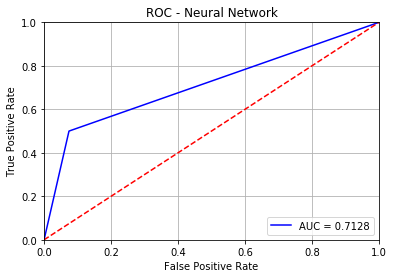

Gini = 0.4256


In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tf_roc_auc = roc_auc_score(y_test_tf,tf_prediction)

fpr, tpr, thresholds = roc_curve(y_test_tf,tf_prediction)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % tf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show() 


gini = 2*(tf_roc_auc-0.5)
print('Gini = %0.4f'% gini)

The accuracy of Neural Network model is around 88% and AUC = 0.71

## 6. Conclusion 

Refering the model algorithm I used, the model who has best prediction is Logistic Regression and Support Vector Machine with 90% accuracy but Neural Network gives the best AUC with score 0.71. But due to the customer's group based on their subscriber is **heavily concentrated** to the ones who don't subscribe, I think the better way to see the model performance is using the AUC, so for my data mining process in this project the Neural Network Model gives best performance. Yet, this result still could be developed more by doing more feature engineering, or parameter (C and gamma) in SVM, or maybe for neural network model I need to explore more the possibility of nodes, dense, layer, activation function, etc. 